In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/movie-review-sentiment-analysis-kernels-only/train.tsv.zip
/kaggle/input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv
/kaggle/input/movie-review-sentiment-analysis-kernels-only/test.tsv.zip


Importing the train,test,submission datasets

In [2]:
test=pd.read_csv(r"/kaggle/input/movie-review-sentiment-analysis-kernels-only/test.tsv.zip",sep="\t")
train=pd.read_csv(r"/kaggle/input/movie-review-sentiment-analysis-kernels-only/train.tsv.zip",sep="\t")
sub = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv', sep=",")

# **Data Analysis**

In [3]:
#lets look at the test data
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [4]:
#lets look at the test data
train.head(100)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
95,96,3,", I suspect ,",2
96,97,3,"I suspect ,",2
97,98,3,I suspect,2
98,99,3,I,2


### **Output Inspection**
* 0 - negative   
* 1 - somewhat negative    
* 2 - neutral   
* 3 - somewhat positive   
* 4 - positive   

In [5]:
# lets look at the shape of the train data
train.shape

(156060, 4)

It is a huge dataset.

In [6]:
# lets look at the shape of the test data
test.shape

(66292, 3)

In [7]:
train.loc[train['SentenceId']==3]

,PhraseId,SentenceId,Phrase,Sentiment
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
82,83,3,Even fans of Ismail Merchant 's work,2
83,84,3,Even fans,2
84,85,3,Even,2
85,86,3,fans,3
86,87,3,of Ismail Merchant 's work,2
87,88,3,Ismail Merchant 's work,2
88,89,3,Ismail Merchant 's,2
89,90,3,Ismail,2
90,91,3,Merchant 's,2


we can see that the sentenceId with value 3 has mostly same  repeated words in Phrase column 

In [8]:
train.loc[train['SentenceId']==2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


Similarly,we can see that the sentenceId with value 2 has mostly same repeated words in Phrase column

**Point to Note**

*       We can say here that each sentenceId is grouped  based on the similar words in phrase column

In [9]:
# since we have different values in  sentenceId,check the total no of unique sentenceId 
print("For train data ",train['SentenceId'].nunique()) 
print("For test data ",test['SentenceId'].nunique()) 

For train data  8529
For test data  3310


In [10]:

pd.DataFrame(train.groupby('SentenceId')['Phrase'].count()).head(10)

,Phrase
SentenceId,
1,63
2,18
3,35
4,40
5,10
6,32
7,15
8,34
9,12


In [11]:
## Returning average count of phrases per sentence, per Dataset
int(train.groupby('SentenceId')['Phrase'].count().mean())

18

In [12]:
int(test.groupby('SentenceId')['Phrase'].count().mean())

20

In [13]:
#Returning average word length of phrases
print("train ",int(np.mean(train['Phrase'].apply(lambda x: len(x.split())))))
print("test",int(np.mean(test['Phrase'].apply(lambda x: len(x.split())))))

train  7
test 6


# **Exploring Target Value**

In [14]:
train_count=train['Sentiment'].value_counts() 

In [15]:
#gets the unique value count of an object
train_labels=train['Sentiment'].value_counts().index

Text(0, 0.5, 'count')

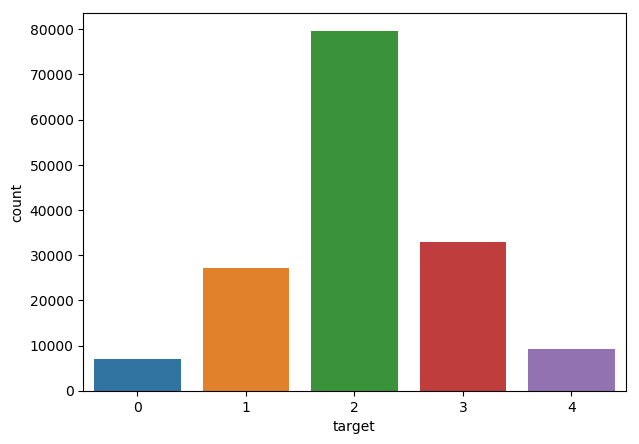

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1, 1, dpi = 100, figsize = (7, 5))
g=sns.barplot(train_labels,train_count)
ax.set_xlabel("target")
ax.set_ylabel("count")

* we can say that almost half of the target values are 2(neutral).
* we can also say that data is not balanced based on target feature

# **Feature Engineering** 

So, we have only phrases as data. And a phrase can contain a single word. And one punctuation mark can cause phrase to receive a different sentiment. Also assigned sentiments can be strange. This means several things:
* using stopwords can be a bad idea, especially when phrases contain one single stopword
* untuation could be important, so it should be used;
* ngrams are necessary to get the most info from data (know about ngrams ->https://www.kaggle.com/c/avito-demand-prediction/discussion/58819)


In [17]:
import nltk

In [18]:
tokenizer = nltk.tokenize.TweetTokenizer()

**TF-IDF**

In [19]:
# import tfidf vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)
vectorizer.fit(full_text)  #learns both train and test data vocabulary


/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f1c5b908908>>,
                use_idf=True, vocabulary=None)

**Why have i fitted the vectorizer with both train and test data?**
> In real world we don't know what will be in new(test) data, so we have to fit only train data. On the other hand, in kaggle we have both train and test, this means we can    take   into account word distribution in both datasets.
Also go through this link https://www.kaggle.com/questions-and-answers/58368 to know more

In [21]:
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

In [22]:
train_vectorized.shape

(156060, 128269)

In [23]:
y = train['Sentiment']

In [24]:
test_vectorized.shape

(66292, 128269)

**Applying Model**

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

Know about OneVsRestClassifier here https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [27]:
ovr.fit(train_vectorized, y)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ovr, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=10)

In [29]:
print("Mean of 10 cv :",np.mean(scores) * 100)
print( "standard deviation",np.std(scores) * 100)

Mean of 10 cv : 55.78751762142764
standard deviation 0.6568083569394298


In [30]:
y_test=ovr.predict(test_vectorized)

In [31]:
sub.Sentiment=y_test

In [32]:
sub.head()

,PhraseId,Sentiment
0,156061,3
1,156062,2
2,156063,3
3,156064,2
4,156065,2


In [33]:
sub.to_csv('submission.csv',index=False)